# Assignment 5 - Analysis and Some Stats

**Course:** Programming for Data Analytics  
**Lecture:** Module 5 : Analysis and Some Stats  
**Author:** Clyde Watts
**Date:** 2025-10-25
**Assignment:** Ireland Population Status


## Assigment Instructions

Upload the notebook assignment05-population.ipynb to you assignments repository.

### Part 1 70%
Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

Weighted mean age (by sex)
The difference between the sexes by age
This part does not need to look at the regions.

ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

### Part 2 20%
In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

### Part 3 10%
In the same notebook.

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

Last modified: Thursday, 23 October 2025, 3:30 PM



In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Differences between the male and female populate by age in Ireland


### Part 1 70%
Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

Weighted mean age (by sex)
The difference between the sexes by age
This part does not need to look at the regions.

ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

**References**


https://data.cso.ie/#
https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en




**Download the data using URL into Dataframe**


Note: 

This system ( my laptop ) has vscode extension Data Wrangler . This will allow me to explore the data quickly.




In [175]:
# Download data from URL into Dataframe
URL = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df_raw = pd.read_csv(URL)
# Get column list
print("Data Frame Columns:",df_raw.columns.to_list())
# Get index 
print("Data Frame Index:",df_raw.index)
df_raw.head()

Data Frame Columns: ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear', 'C02199V02655', 'Sex', 'C02076V03371', 'Single Year of Age', 'C03789V04537', 'Administrative Counties', 'UNIT', 'VALUE']
Data Frame Index: RangeIndex(start=0, stop=9792, step=1)


,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713
3,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,233860
4,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,330506


I am interested in the following Columns , Sex , 'Single Year of Age',  'Administrative Counties'

In [176]:
# Get the sum of values by Sex 
# This will tell me if that Both sexes is a agregation of Female and Male
df_raw.groupby(['Sex']).sum()['VALUE']
# I assume that "Both sexes" is the some of Male and Female 

Sex
Both sexes    20596556
Female        10418360
Male          10178196
Name: VALUE, dtype: int64

In [177]:
# Get the sum of the 'Single Year of Age'
df_raw.groupby(['Single Year of Age'],sort=True).sum()['VALUE']


Single Year of Age
1 year                  225680
10 years                296404
100 years and over        2952
11 years                300636
12 years                305016
                        ...   
97 years                  3796
98 years                  2488
99 years                  1764
All ages              20596556
Under 1 year            231184
Name: VALUE, Length: 102, dtype: int64

In [178]:
# Now get sum of 'Administrative Counties'
df_raw.groupby(['Administrative Counties'],sort=True).sum()['VALUE']

Administrative Counties
Carlow County Council                      247872
Cavan County Council                       326816
Clare County Council                       511752
Cork City Council                          896016
Cork County Council                       1440608
Donegal County Council                     668336
Dublin City Council                       2370852
Dún Laoghaire Rathdown County Council      935440
Fingal County Council                     1322024
Galway City Council                        337656
Galway County Council                      773292
Ireland                                  20596556
Kerry County Council                       625832
Kildare County Council                     991096
Kilkenny County Council                    416640
Laois County Council                       367508
Leitrim County Council                     140796
Limerick City & County Council             838144
Longford County Council                    187004
Louth County Council      

Remove columns that are not required

In [179]:
drop_list = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear', 'C02199V02655',  'C02076V03371', 'C03789V04537',
               'UNIT']
df_raw.drop(columns=drop_list,inplace=True)
print("Data Frame Columns after drop:",df_raw.columns.to_list())
df_raw.head()

Data Frame Columns after drop: ['Sex', 'Single Year of Age', 'Administrative Counties', 'VALUE']


,Sex,Single Year of Age,Administrative Counties,VALUE
0,Both sexes,All ages,Ireland,5149139
1,Both sexes,All ages,Carlow County Council,61968
2,Both sexes,All ages,Dublin City Council,592713
3,Both sexes,All ages,Dún Laoghaire Rathdown County Council,233860
4,Both sexes,All ages,Fingal County Council,330506


Now remove all counties except Ireland - the whole country and exclude Both Sexes from Sex ,and All ages from Single Year Of Age

In [180]:
# now create a data frame for analysis
# Counts == Ireland and Sex != Both and Single Year of Age != All ages
# Note the filtered data frame needed to be copied to avoid SettingWithCopyWarning 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# Looking at it from a database perspective we are creating a new table from a select statement , rather than a view
df_population = df_raw[(df_raw['Administrative Counties']=='Ireland') & (df_raw['Sex'] != 'Both sexes') & (df_raw['Single Year of Age'] != 'All ages')].copy()
# Also drop "Ireland" column as it is not needed now
df_population.drop(columns=['Administrative Counties'],inplace=True)
# Rename the VALUE column to Population - Prettier for analysis
df_population.rename(columns={'VALUE':'Population'},inplace=True)
df_population.head()

,Sex,Single Year of Age,Population
3296,Male,Under 1 year,29610
3328,Male,1 year,28875
3360,Male,2 years,30236
3392,Male,3 years,31001
3424,Male,4 years,31686


Add another column called Year No - which is the year number . 
- Under 1 Year will be Zero

In [181]:
# First replace the 'Under 1 year' with '0' as per lecture instructions
df_population["Year No"] = df_population['Single Year of Age'].replace({'Under 1 year': '0'})
# Now extract the digit from the year number string and convert to integer
df_population['Year No'] = df_population['Year No'].str.extract('(\d+)',expand=False).astype(int)
df_population.head()


,Sex,Single Year of Age,Population,Year No
3296,Male,Under 1 year,29610,0
3328,Male,1 year,28875,1
3360,Male,2 years,30236,2
3392,Male,3 years,31001,3
3424,Male,4 years,31686,4


### Part 1.1  Calculate The "Weighted" Mean Per Sex

There are a couple of approaches

In [182]:
# Do the weighted for male first
male_weighted_mean = np.average(df_population[df_population['Sex'] == 'Male']['Year No'], 
                                weights=df_population[df_population['Sex'] == 'Male']['Population'])
# Do the weighted for female next
female_weighted_mean = np.average(df_population[df_population['Sex'] == 'Female']['Year No'], 
                                  weights=df_population[df_population['Sex'] == 'Female']['Population'])
print("Weighted Mean Age by Sex:")
print(f"Male: {male_weighted_mean}")
print(f"Female: {female_weighted_mean}")

Weighted Mean Age by Sex:
Male: 37.7394477371039
Female: 38.9397958987787


In [183]:
# A more manual method , the np method is counter intuitive
# explicitly work out the weighted age
df_population['weighted_age'] = df_population['Year No'] * df_population['Population']
# Now do the group by sum and divide
weighted_mean_by_sex = df_population.groupby('Sex').sum()['weighted_age'] / df_population.groupby('Sex').sum()['Population']
print("Weighted Mean Age by Sex:")
print(weighted_mean_by_sex)

Weighted Mean Age by Sex:
Sex
Female    38.939796
Male      37.739448
dtype: float64



## Part 1.2 The difference between the sexes by age

The assumtion is we subtract the one sex Female from the other Male

In [184]:
# Pivot data on sex so that we have year no , and population for both male and female
df_population_sex_pivot = df_population.pivot(index='Year No', columns='Sex', values='Population').reset_index()
# create a extra column for difference
df_population_sex_pivot['Difference'] = df_population_sex_pivot['Male'] - df_population_sex_pivot['Female']
df_population_sex_pivot

Sex,Year No,Female,Male,Difference
0,0,28186,29610,1424
1,1,27545,28875,1330
2,2,28974,30236,1262
3,3,29483,31001,1518
4,4,29819,31686,1867
...,...,...,...,...
96,96,956,327,-629
97,97,732,217,-515
98,98,492,130,-362
99,99,336,105,-231


__Plot a graph with the difference__

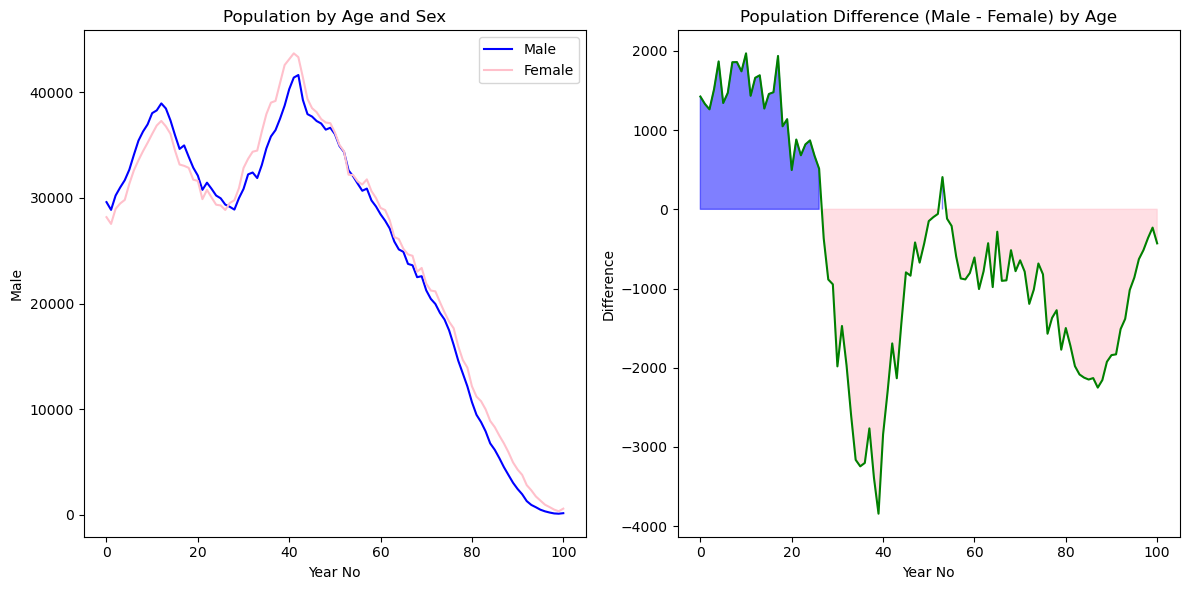

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot the populations
sns.lineplot(data=df_population_sex_pivot, x='Year No', y='Male', ax=ax[0], label='Male', color='blue')
sns.lineplot(data=df_population_sex_pivot, x='Year No', y='Female', ax=ax[0], label='Female', color='pink')
ax[0].set_title('Population by Age and Sex')

# Plot the difference
sns.lineplot(data=df_population_sex_pivot, x='Year No', y='Difference', ax=ax[1], color='green')
# plot the positive numbers blue negative pink
ax[1].fill_between(df_population_sex_pivot['Year No'], df_population_sex_pivot['Difference'], where=(df_population_sex_pivot['Difference'] > 0), color='blue', alpha=0.5)
ax[1].fill_between(df_population_sex_pivot['Year No'], df_population_sex_pivot['Difference'], where=(df_population_sex_pivot['Difference'] < 0), color='pink', alpha=0.5)
ax[1].set_title('Population Difference (Male - Female) by Age')
plt.tight_layout()
plt.show()


## Part 2: Ten Year Window
### Part 2 20%
In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

In the example , for an age 35 the range starts from 31 ( 35-4 ) and ( 35 + 4) 39 . The 35 year is included in both directions , thus it spans 9 years.  The window will be reduces if there are no ages below or above the range , example 100 will be 100-4 to 100. , and 0 will be 0 to 0 + 4.

Using the following function to do the calculation , this is equivalent to a ordered analytic function in SQL
The following has a window - the range , and if the range is centered . As well as min_periods which allows for partial windows.

An alternative is to use a cyclic window , that is use a window which wraps around from 0 to 100 in a cyclic manner 

In [186]:
# Some ytest metrics to validate the rolling window
df_population_sex_pivot['One']=1
df_population_sex_pivot['Increasing Age Group'] = df_population_sex_pivot.index + 1
df_population_sex_pivot_following = df_population_sex_pivot[['Male', 'Female','One','Increasing Age Group']].rolling(window=9, center=True, min_periods=0).sum()
df_population_sex_pivot_following['Difference'] = df_population_sex_pivot_following['Male'] - df_population_sex_pivot_following['Female']
df_population_sex_pivot_following

Sex,Male,Female,One,Increasing Age Group,Difference
0,151408.0,144007.0,5.0,15.0,7401.0
1,184092.0,175349.0,6.0,21.0,8743.0
2,218184.0,207971.0,7.0,28.0,10213.0
3,253613.0,241543.0,8.0,36.0,12070.0
4,289909.0,275980.0,9.0,45.0,13929.0
...,...,...,...,...,...
96,4367.0,11310.0,9.0,873.0,-6943.0
97,3070.0,8501.0,8.0,780.0,-5431.0
98,2133.0,6181.0,7.0,686.0,-4048.0
99,1415.0,4444.0,6.0,591.0,-3029.0


To get the N year , the Nth record is retrieved from the data frame

In [187]:
# The Nth year record
Nth_year = 35
# Calculate the population difference in the 9 year window centered on Nth_year
print(f"Population difference in 9 year window centered on age {Nth_year}:")
print(f"                                             Male: {df_population_sex_pivot_following.loc[Nth_year, 'Male']}")
print(f"                                             Female: {df_population_sex_pivot_following.loc[Nth_year, 'Female']}")
print(f"                                             Difference: {df_population_sex_pivot_following.loc[Nth_year, 'Difference']}")  

Population difference in 9 year window centered on age 35:
                                             Male: 312871.0
                                             Female: 338522.0
                                             Difference: -25651.0


### Part 3 10%
In the same notebook.

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

Last modified: Thursday, 23 October 2025, 3:30 PM


In [ ]:
df_raw

,Sex,Single Year of Age,Administrative Counties,VALUE
0,Both sexes,All ages,Ireland,5149139
1,Both sexes,All ages,Carlow County Council,61968
2,Both sexes,All ages,Dublin City Council,592713
3,Both sexes,All ages,Dún Laoghaire Rathdown County Council,233860
4,Both sexes,All ages,Fingal County Council,330506
...,...,...,...,...
9787,Female,100 years and over,Roscommon County Council,7
9788,Female,100 years and over,Sligo County Council,9
9789,Female,100 years and over,Cavan County Council,12
9790,Female,100 years and over,Donegal County Council,31
